In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data directory

In [2]:
# raw_data
data_directory = os.path.join( '..','data','raw_data/')

In [3]:
# comedy link list
df_list = pd.read_csv(data_directory+'comedy_link_list_OCT_19.csv')

In [5]:
df_list.head()

,name,raw_title,summary,link
0,Nikki Glaser,Nikki Glaser: Bangin’ (2019) – Full Transcript,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,https://scrapsfromtheloft.com/2019/10/04/nikki...
1,Ryan Hamilton,Ryan Hamilton Stand-Up – The Tonight Show Star...,Ryan Hamilton makes his Tonight Show debut wit...,https://scrapsfromtheloft.com/2019/09/25/ryan-...
2,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand Stand-Up – The Tonight Show Starr...,Mark Normand is back on The Tonight Show with ...,https://scrapsfromtheloft.com/2019/09/21/mark-...
3,George Carlin,George Carlin: Dumb Americans (2006) – Full Tr...,"Full transcript of George Carlin's ""Dumb Ameri...",https://scrapsfromtheloft.com/2019/09/12/georg...
4,Bill Burr,Bill Burr: Paper Tiger (2019) – Full Transcript,"Only a few weeks after Dave Chappelle's ""Stick...",https://scrapsfromtheloft.com/2019/09/10/bill-...


In [6]:
# data_transcrips
df_transcripts = pd.read_csv(data_directory+'data_transcripts_OCT_19.csv')
df_transcripts.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df_transcripts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
transcript    284 non-null object
link          284 non-null object
dtypes: object(2)
memory usage: 4.5+ KB


In [8]:
df_transcripts.head()

,transcript,link
0,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...
1,"Published on Sep 11, 2019\nThe Tonight Show St...",https://scrapsfromtheloft.com/2019/09/25/ryan-...
2,"Aired on September 19, 2019\nHey, hey. All rig...",https://scrapsfromtheloft.com/2019/09/21/mark-...
3,From Life Is Worth Losing\nRecorded on Novembe...,https://scrapsfromtheloft.com/2019/09/12/georg...
4,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...


## Merge datframes
- on "link"

In [9]:
data = df_list.merge(df_transcripts,left_on='link',right_on='link')

In [10]:
data.head()

,name,raw_title,summary,link,transcript
0,Nikki Glaser,Nikki Glaser: Bangin’ (2019) – Full Transcript,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,https://scrapsfromtheloft.com/2019/10/04/nikki...,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...
1,Ryan Hamilton,Ryan Hamilton Stand-Up – The Tonight Show Star...,Ryan Hamilton makes his Tonight Show debut wit...,https://scrapsfromtheloft.com/2019/09/25/ryan-...,"Published on Sep 11, 2019\nThe Tonight Show St..."
2,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand Stand-Up – The Tonight Show Starr...,Mark Normand is back on The Tonight Show with ...,https://scrapsfromtheloft.com/2019/09/21/mark-...,"Aired on September 19, 2019\nHey, hey. All rig..."
3,George Carlin,George Carlin: Dumb Americans (2006) – Full Tr...,"Full transcript of George Carlin's ""Dumb Ameri...",https://scrapsfromtheloft.com/2019/09/12/georg...,From Life Is Worth Losing\nRecorded on Novembe...
4,Bill Burr,Bill Burr: Paper Tiger (2019) – Full Transcript,"Only a few weeks after Dave Chappelle's ""Stick...",https://scrapsfromtheloft.com/2019/09/10/bill-...,"Recorded Live at the Royal Albert Hall, London..."


## Display null data

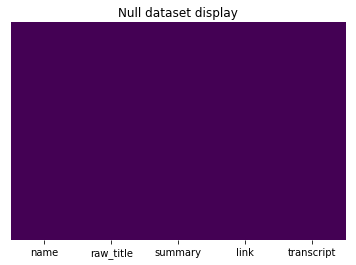

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [12]:
# change col order
data = data[['name','raw_title','summary','transcript','link']]

## Save

In [13]:
data.to_csv(data_directory+'03_data_merge_OCT_19.csv',index=False)